In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


In [2]:
Df=pd.read_csv('C:/Users/Hüseyin/Desktop/DataSets/archive (4)/gold_price_data.csv')

In [3]:
Df

,Date,Value
0,1970-01-01,35.20
1,1970-04-01,35.10
2,1970-07-01,35.40
3,1970-10-01,36.20
4,1971-01-01,37.40
...,...,...
10782,2020-03-09,1672.50
10783,2020-03-10,1655.70
10784,2020-03-11,1653.75
10785,2020-03-12,1570.70


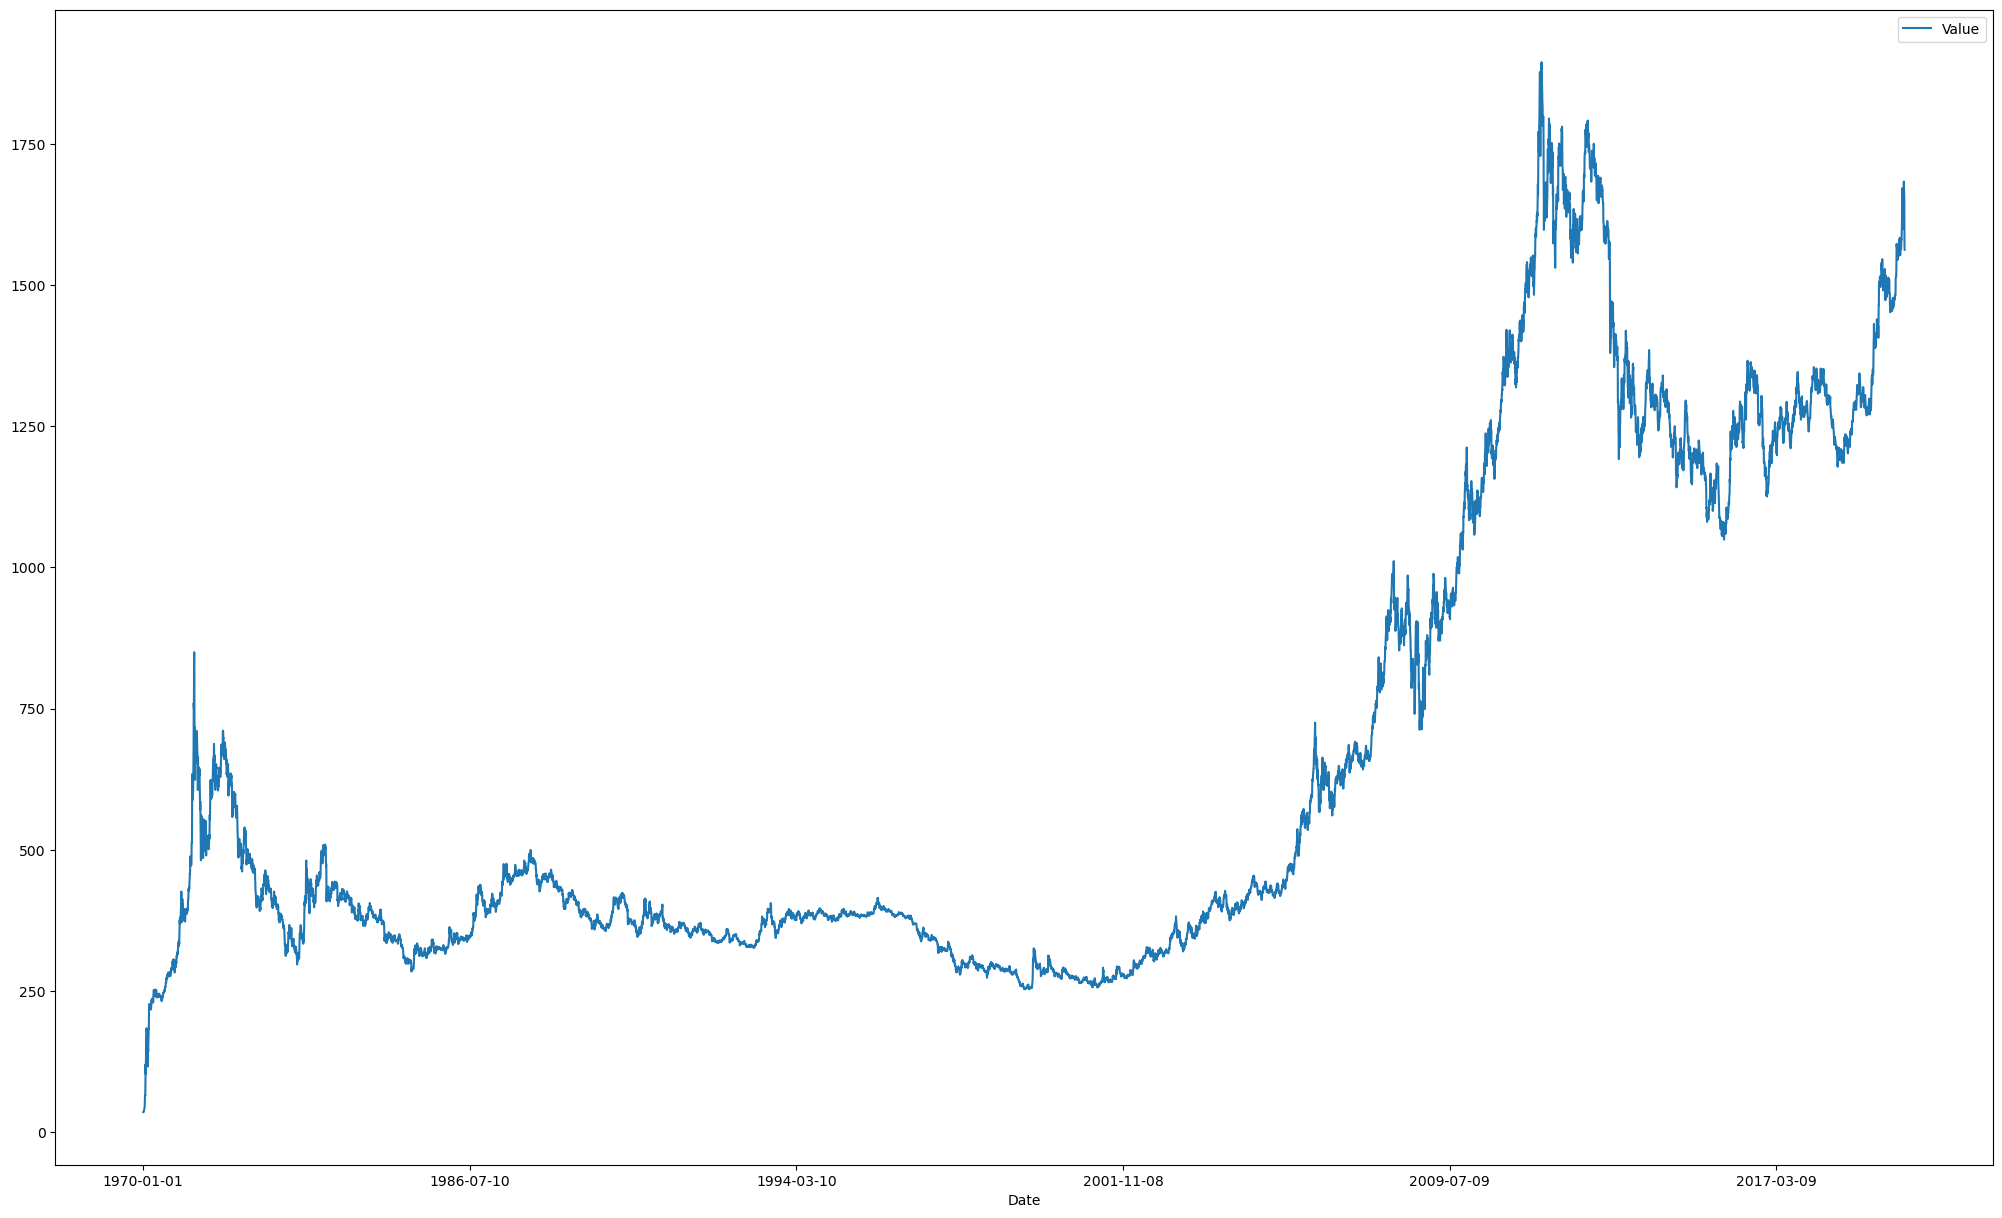

In [4]:
Df.plot(x="Date", y="Value", kind="line",figsize=(25,15))
plt.show()

In [5]:
def make_data(data,lag=3):
    X=[]
    y=[]
    for i in range(len(data)-lag):
        X.append(data[i:i+lag])
        y.append(data[i+lag])
    return np.array(X), np.array(y)

mu=Df.Value[:-1200].mean()
sigma=Df.Value[:-1200].std()

consumption=(Df.Value-mu)/sigma

X,y=make_data(Df.Value.values,lag=30)
print(X.shape)
print(y.shape)

(10757, 30)
(10757,)


In [6]:
X_train=X[:-1200]
y_train=y[:-1200]

X_test=X[-1200:]
y_test=y[-1200:]

0.9921593809878998


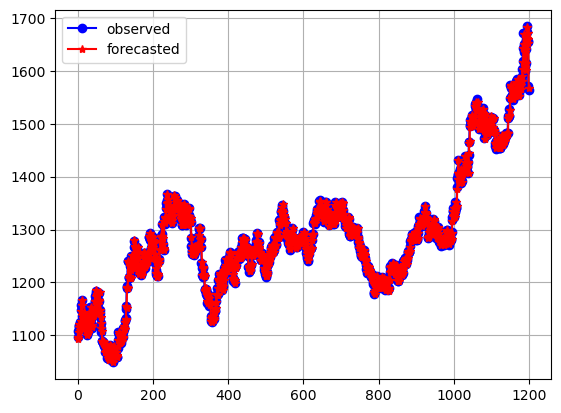

In [7]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
mdl=Ridge()
mdl.fit(X_train,y_train)
ypred=mdl.predict(X_test)


plt.plot(y_test,'-ob',label='observed')
plt.plot(ypred,'-*r', label='forecasted')
plt.grid()
plt.legend()


print(r2_score(y_test,ypred))

In [8]:
X_train

array([[  35.2 ,   35.1 ,   35.4 , ...,  116.  ,  134.5 ,  148.3 ],
       [  35.1 ,   35.4 ,   36.2 , ...,  134.5 ,  148.3 ,  142.6 ],
       [  35.4 ,   36.2 ,   37.4 , ...,  148.3 ,  142.6 ,  155.5 ],
       ...,
       [1173.75, 1172.65, 1170.5 , ..., 1098.4 , 1091.9 , 1090.65],
       [1172.65, 1170.5 , 1176.  , ..., 1091.9 , 1090.65, 1085.1 ],
       [1170.5 , 1176.  , 1171.  , ..., 1090.65, 1085.1 , 1089.75]])

In [9]:
y_train

array([ 142.6 ,  155.5 ,  165.  , ..., 1085.1 , 1089.75, 1093.5 ])

In [10]:
Df['year']=pd.DatetimeIndex(Df['Date']).year

In [11]:
Df['month']=pd.DatetimeIndex(Df['Date']).month

In [12]:
Df['day']=pd.DatetimeIndex(Df['Date']).day

In [13]:
Df

,Date,Value,year,month,day
0,1970-01-01,35.20,1970,1,1
1,1970-04-01,35.10,1970,4,1
2,1970-07-01,35.40,1970,7,1
3,1970-10-01,36.20,1970,10,1
4,1971-01-01,37.40,1971,1,1
...,...,...,...,...,...
10782,2020-03-09,1672.50,2020,3,9
10783,2020-03-10,1655.70,2020,3,10
10784,2020-03-11,1653.75,2020,3,11
10785,2020-03-12,1570.70,2020,3,12


In [14]:
Df.groupby('year').count()

,Date,Value,month,day
year,,,,
1970,4,4,4,4
1971,4,4,4,4
1972,4,4,4,4
1973,4,4,4,4
1974,4,4,4,4
1975,4,4,4,4
1976,4,4,4,4
1977,4,4,4,4
1978,5,5,5,5


In [15]:
Df_new=Df[Df['year']>1978].drop(['month','day','Date'],axis=1)
Df_new=Df_new.set_index('year')
Df_new

,Value
year,
1979,226.00
1979,226.80
1979,218.60
1979,223.15
1979,225.50
...,...
2020,1672.50
2020,1655.70
2020,1653.75


In [16]:
def make_data1(data,lag=3):
    X=[]
    y=[]
    for i in range(len(data)-lag):
        X.append(data[i:i+lag])
        y.append(data[i+lag])
    return np.array(X), np.array(y)

mu=Df_new.Value[:-1200].mean()
sigma=Df_new.Value[:-1200].std()

consumption=(Df_new.Value-mu)/sigma

X,y=make_data(Df_new.Value.values,lag=12)
print(X.shape)
print(y.shape)

(10738, 12)
(10738,)


In [17]:
X_train=X[:-1200]
y_train=y[:-1200]

X_test=X[-1200:]
y_test=y[-1200:]

0.992150129998542


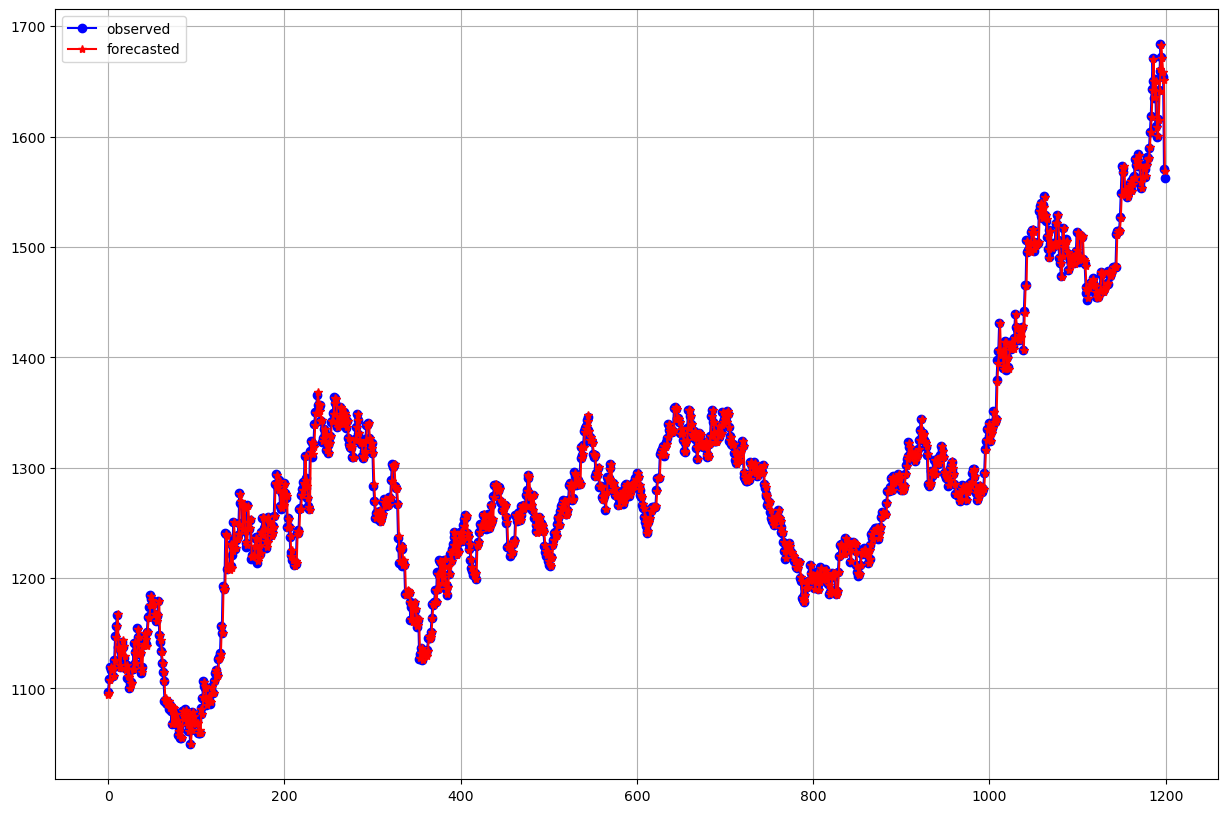

In [18]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
mdl=Ridge(alpha=1000)
mdl.fit(X_train,y_train)
ypred=mdl.predict(X_test)

plt.figure(figsize=(15,10))

plt.plot(y_test,'-ob',label='observed')
plt.plot(ypred,'-*r', label='forecasted')
plt.grid()
plt.legend()

print(r2_score(y_test,ypred))

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
cross_val_score(mdl,X_train,y_train,cv=10,scoring='r2').mean()

0.9895393415806832